# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Define functions for estimating future salary and stock allocation

In [2]:
def salary(t, starting=125000, ending=166000, saturation_month=(12 * 20)):
    '''
    Expected salary as a function of time (in months)
    '''
    m = (ending - starting) / saturation_month
    base = starting + m * t
    return min(max(base, starting), ending)

def stock_frac(t, starting=0.9, ending=0.1, saturation_month=(12 * 40)):
    '''
    Expected fraction of portfolio in stocks as a function of time (in months)
    '''
    m = (ending - starting) / saturation_month
    base = starting + m * t
    return max(min(base, starting), ending)

# Define stock and bond growth rate ranges

In [3]:
r_sl = 0.06 / 12        # Annual stock market growth rate ~6% (low)
r_sm = 0.09 / 12        # Annual stock market growth rate ~9% (med)
r_su = 0.12 / 12        # Annual stock market growth rate ~12% (high)

r_bl = 0.02 / 12        # Annual bond market growth rate ~2% (low)
r_bm = 0.04 / 12        # Annual bond market growth rate ~4% (med)
r_bu = 0.06 / 12        # Annual bond market growth rate ~6% (high)

# Compute future portfolio values

In [4]:
P_0 = ((0.0665 + 0.085) * salary(0)) / 12
Al = P_0
Am = P_0
Au = P_0

yl, ym, yu = [], [], []
time_range = np.arange(12 * 40)

for t in time_range:
    P = ((0.0665 + 0.085) * salary(t)) / 12
    Al = (1 + r_sl) * stock_frac(t) * (Al + P) + (1 + r_bl) * (1 - stock_frac(t)) * (Al + P) 
    Am = (1 + r_sm) * stock_frac(t) * (Am + P) + (1 + r_bm) * (1 - stock_frac(t)) * (Am + P) 
    Au = (1 + r_su) * stock_frac(t) * (Au + P) + (1 + r_bu) * (1 - stock_frac(t)) * (Au + P)
    yl.append(Al)
    ym.append(Am)
    yu.append(Au)
    
yl, ym, yu = np.asarray(yl), np.asarray(ym), np.asarray(yu)

# Compute TRS annuity value

In [5]:
trs_annuity = 166000 * 40 * 0.023

# Plot projected salary by year

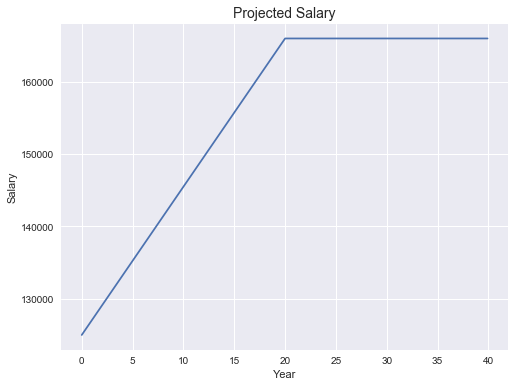

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(time_range / 12, [salary(t) for t in time_range])
plt.title('Projected Salary', size=14)
plt.ylabel('Salary')
_ = plt.xlabel('Year')

# Plot projected fraction of portfolio in stocks by year

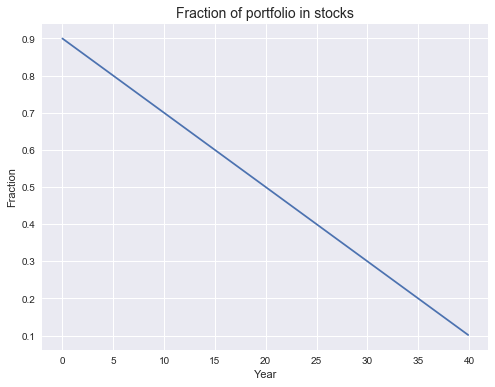

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(time_range / 12, [stock_frac(t) for t in time_range])
plt.title('Fraction of portfolio in stocks', size=14)
plt.ylabel('Fraction')
_ = plt.xlabel('Year')

# Plot projected value of portfolio by year

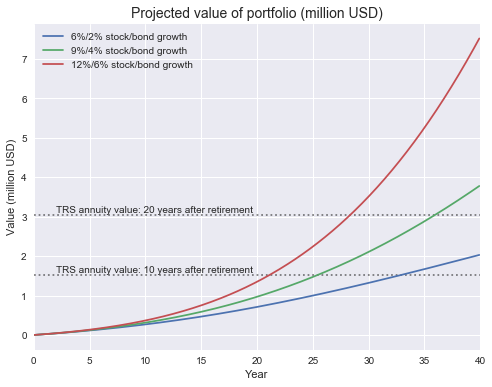

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(trs_annuity * 10 / 1e6, linestyle=':', c='k', alpha=0.5)
plt.axhline(trs_annuity * 20 / 1e6, linestyle=':', c='k', alpha=0.5)
plt.plot(time_range / 12, yl / 1e6, label='6%/2% stock/bond growth')
plt.plot(time_range / 12, ym / 1e6, label='9%/4% stock/bond growth')
plt.plot(time_range / 12, yu / 1e6, label='12%/6% stock/bond growth')
plt.text(2, 3.1, 'TRS annuity value: 20 years after retirement')
plt.text(2, 1.6, 'TRS annuity value: 10 years after retirement')
plt.title('Projected value of portfolio (million USD)', size=14)
plt.ylabel('Value (million USD)')
plt.xlabel('Year')
plt.xlim(0, 40)
_ = plt.legend(loc=2)